# Description

For the Final Project of a nine month tech bootcamp, me and my partner chose to discuss how data science can be applied to the stock market in various ways.  This notebook only represents my portion of the project.  A link to the entire presentation is down below.

# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as dr
from matplotlib import rcParams

# Get S&P 500 Data

In [2]:
stock=['^GSPC']
data=dr.get_data_yahoo(stock, start='2019-09-01', end='2021-09-18')['Adj Close']
data

Symbols,^GSPC
Date,
2019-09-03,2906.270020
2019-09-04,2937.780029
2019-09-05,2976.000000
2019-09-06,2978.709961
2019-09-09,2978.429932
...,...
2021-09-13,4468.729980
2021-09-14,4443.049805
2021-09-15,4480.700195


# Stock Data

In [3]:
stocks=['AAPL', 'MSFT', 'AMZN', 'BABA', 'COKE', 'PEP', 'GOOG', 'F', 'GM']
stocksDF = dr.get_data_yahoo(stocks, start = '2019-09-01', end= '2021-09-18')['Adj Close']

#Add S&P 500 data and rename the column "GSPC"
stocksDF['GSPC']=data

stocksDF

Symbols,AAPL,MSFT,AMZN,BABA,COKE,PEP,GOOG,F,GM,GSPC
Date,,,,,,,,,,
2019-09-03,50.594364,133.285629,1789.839966,172.410004,331.243744,128.853699,1168.390015,8.803351,35.719585,2906.270020
2019-09-04,51.452778,134.843491,1800.619995,174.330002,310.488281,130.437881,1181.410034,8.900091,37.006691,2937.780029
2019-09-05,52.458755,137.214462,1840.719971,178.940002,303.569824,128.347214,1211.380005,9.035527,37.857082,2976.000000
2019-09-06,52.453842,136.283722,1833.510010,176.690002,296.303925,129.659195,1204.930054,9.035527,37.905952,2978.709961
2019-09-09,52.677666,134.735687,1831.349976,177.779999,290.288666,128.743652,1204.410034,9.229008,38.687923,2978.429932
...,...,...,...,...,...,...,...,...,...,...
2021-09-13,149.550003,296.989990,3457.169922,165.410004,395.700012,155.759995,2869.300049,12.990000,50.820000,4468.729980
2021-09-14,148.119995,299.790009,3450.000000,160.149994,386.029999,155.149994,2868.120117,12.860000,50.740002,4443.049805
2021-09-15,149.029999,304.820007,3475.790039,157.860001,385.350006,156.020004,2904.120117,13.220000,51.820000,4480.700195


# Sector Data

In [4]:
sectors=['XLE','XLB','XLI','XLY','XLP','XLV','XLF','SMH','XTL','XLU','IYR']
sectorsDF=dr.get_data_yahoo(sectors, start='2019-09-01', end='2021-09-18')['Adj Close']
sectorsDF.rename(columns={'XLE':'Energy',
                      'XLB':'Materials', 
                      'XLI':'Industrial',
                      'XLY':'ConsDisc',
                      'XLP':'ConsStaple',
                      'XLV':'Health',
                      'XLF':'Financial',
                      'SMH':'InfoTech',
                      'XTL':'Communication',
                      'XLU':'Utilities',
                      'IYR':'RealEstate'
                     },inplace=True)
sectorsDF

Symbols,Energy,Materials,Industrial,ConsDisc,ConsStaple,Health,Financial,InfoTech,Communication,Utilities,RealEstate
Date,,,,,,,,,,,
2019-09-03,49.451832,53.752327,71.809082,116.461914,57.520214,86.600906,25.378895,110.177429,64.483330,59.627296,88.007614
2019-09-04,50.143463,54.411812,72.721931,117.615875,58.038242,86.658592,25.626583,113.425705,64.970589,59.683464,88.695755
2019-09-05,50.765942,54.497833,74.028778,119.865120,57.680328,87.514313,26.150553,116.869667,65.993828,59.037483,88.139587
2019-09-06,51.033947,54.708099,74.182510,120.158493,57.868706,87.754692,26.141024,116.967522,66.178978,58.803425,88.309265
2019-09-09,52.054104,54.421364,74.403526,120.618126,57.736847,86.947044,26.541142,117.417572,66.178978,58.513206,87.734245
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,48.569920,83.624420,101.900887,183.076141,71.613663,132.369995,37.846146,274.320007,99.720337,68.330002,107.188431
2021-09-14,47.868443,82.708427,100.674843,182.467041,71.285713,132.350006,37.338345,274.500000,96.890480,68.099998,106.919159
2021-09-15,49.656715,83.584595,101.781273,183.645279,71.544098,133.210007,37.696793,275.459991,97.655029,68.010002,107.318077


# Rate of Returns

## New Dataframe

In [5]:
#Start date is the beginning of the Final Project
stocks=['AAPL', 'MSFT', 'AMZN', 'BABA', 'COKE', 'PEP', 'GOOG', 'F', 'GM']
returnsDF = dr.get_data_yahoo(stocks, start = '2021-08-23', end = '2021-09-18')['Adj Close']
returnsDF

Symbols,AAPL,MSFT,AMZN,BABA,COKE,PEP,GOOG,F,GM
Date,,,,,,,,,
2021-08-23,149.710007,304.649994,3265.870117,161.059998,400.000000,156.775406,2821.989990,12.73,48.180000
2021-08-24,149.619995,302.619995,3305.780029,171.699997,397.579987,154.828751,2847.969971,13.08,49.570000
2021-08-25,148.360001,302.010010,3299.179932,169.100006,396.010010,154.143448,2859.000000,13.17,49.700001
2021-08-26,147.539993,299.089996,3316.000000,165.240005,391.100006,153.577332,2842.459961,12.90,48.619999
2021-08-27,148.600006,299.720001,3349.629883,159.470001,399.950012,153.885223,2891.010010,13.31,49.799999
2021-08-30,153.119995,303.589996,3421.570068,162.289993,401.000000,154.938004,2909.389893,13.05,49.169998
2021-08-31,151.830002,301.880005,3470.790039,166.990005,406.160004,155.325348,2909.239990,13.03,49.009998
2021-09-01,152.509995,301.829987,3479.000000,173.279999,407.720001,156.835007,2916.840088,13.11,49.110001
2021-09-02,153.649994,301.149994,3463.120117,172.000000,405.000000,156.949997,2884.379883,13.01,48.950001


## Calculating Returns

In [6]:
returnsDF['AAPL_return']=round((returnsDF['AAPL'].pct_change(1))*100,2)
returnsDF['MSFT_return']=round((returnsDF['MSFT'].pct_change(1))*100,2)
returnsDF['AMZN_return']=round((returnsDF['AMZN'].pct_change(1))*100,2)
returnsDF['BABA_return']=round((returnsDF['BABA'].pct_change(1))*100,2)                               
returnsDF['COKE_return']=round((returnsDF['COKE'].pct_change(1))*100,2)
returnsDF['PEP_return']=round((returnsDF['PEP'].pct_change(1))*100,2)
returnsDF['GOOG_return']=round((returnsDF['GOOG'].pct_change(1))*100,2)
returnsDF['F_return']=round((returnsDF['F'].pct_change(1))*100,2)
returnsDF['GM_return']=round((returnsDF['GM'].pct_change(1))*100,2)
returnsDF

Symbols,AAPL,MSFT,AMZN,BABA,COKE,PEP,GOOG,F,GM,AAPL_return,MSFT_return,AMZN_return,BABA_return,COKE_return,PEP_return,GOOG_return,F_return,GM_return
Date,,,,,,,,,,,,,,,,,,
2021-08-23,149.710007,304.649994,3265.870117,161.059998,400.000000,156.775406,2821.989990,12.73,48.180000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-24,149.619995,302.619995,3305.780029,171.699997,397.579987,154.828751,2847.969971,13.08,49.570000,-0.06,-0.67,1.22,6.61,-0.61,-1.24,0.92,2.75,2.89
2021-08-25,148.360001,302.010010,3299.179932,169.100006,396.010010,154.143448,2859.000000,13.17,49.700001,-0.84,-0.20,-0.20,-1.51,-0.39,-0.44,0.39,0.69,0.26
2021-08-26,147.539993,299.089996,3316.000000,165.240005,391.100006,153.577332,2842.459961,12.90,48.619999,-0.55,-0.97,0.51,-2.28,-1.24,-0.37,-0.58,-2.05,-2.17
2021-08-27,148.600006,299.720001,3349.629883,159.470001,399.950012,153.885223,2891.010010,13.31,49.799999,0.72,0.21,1.01,-3.49,2.26,0.20,1.71,3.18,2.43
2021-08-30,153.119995,303.589996,3421.570068,162.289993,401.000000,154.938004,2909.389893,13.05,49.169998,3.04,1.29,2.15,1.77,0.26,0.68,0.64,-1.95,-1.27
2021-08-31,151.830002,301.880005,3470.790039,166.990005,406.160004,155.325348,2909.239990,13.03,49.009998,-0.84,-0.56,1.44,2.90,1.29,0.25,-0.01,-0.15,-0.33
2021-09-01,152.509995,301.829987,3479.000000,173.279999,407.720001,156.835007,2916.840088,13.11,49.110001,0.45,-0.02,0.24,3.77,0.38,0.97,0.26,0.61,0.20
2021-09-02,153.649994,301.149994,3463.120117,172.000000,405.000000,156.949997,2884.379883,13.01,48.950001,0.75,-0.23,-0.46,-0.74,-0.67,0.07,-1.11,-0.76,-0.33


## Drop the Stock Columns

In [7]:
returns1DF=returnsDF.drop(columns=['AAPL', 'MSFT', 'AMZN', 'BABA', 'COKE', 'PEP', 'GOOG', 'F', 'GM'])
returns1DF

Symbols,AAPL_return,MSFT_return,AMZN_return,BABA_return,COKE_return,PEP_return,GOOG_return,F_return,GM_return
Date,,,,,,,,,
2021-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-24,-0.06,-0.67,1.22,6.61,-0.61,-1.24,0.92,2.75,2.89
2021-08-25,-0.84,-0.20,-0.20,-1.51,-0.39,-0.44,0.39,0.69,0.26
2021-08-26,-0.55,-0.97,0.51,-2.28,-1.24,-0.37,-0.58,-2.05,-2.17
2021-08-27,0.72,0.21,1.01,-3.49,2.26,0.20,1.71,3.18,2.43
2021-08-30,3.04,1.29,2.15,1.77,0.26,0.68,0.64,-1.95,-1.27
2021-08-31,-0.84,-0.56,1.44,2.90,1.29,0.25,-0.01,-0.15,-0.33
2021-09-01,0.45,-0.02,0.24,3.77,0.38,0.97,0.26,0.61,0.20
2021-09-02,0.75,-0.23,-0.46,-0.74,-0.67,0.07,-1.11,-0.76,-0.33


## Drop NAs

In [8]:
returns2DF=returns1DF.dropna()
returns2DF

Symbols,AAPL_return,MSFT_return,AMZN_return,BABA_return,COKE_return,PEP_return,GOOG_return,F_return,GM_return
Date,,,,,,,,,
2021-08-24,-0.06,-0.67,1.22,6.61,-0.61,-1.24,0.92,2.75,2.89
2021-08-25,-0.84,-0.20,-0.20,-1.51,-0.39,-0.44,0.39,0.69,0.26
2021-08-26,-0.55,-0.97,0.51,-2.28,-1.24,-0.37,-0.58,-2.05,-2.17
2021-08-27,0.72,0.21,1.01,-3.49,2.26,0.20,1.71,3.18,2.43
2021-08-30,3.04,1.29,2.15,1.77,0.26,0.68,0.64,-1.95,-1.27
2021-08-31,-0.84,-0.56,1.44,2.90,1.29,0.25,-0.01,-0.15,-0.33
2021-09-01,0.45,-0.02,0.24,3.77,0.38,0.97,0.26,0.61,0.20
2021-09-02,0.75,-0.23,-0.46,-0.74,-0.67,0.07,-1.11,-0.76,-0.33
2021-09-03,0.42,-0.00,0.43,-0.99,-1.60,0.09,0.39,-0.92,-0.27


# Plot the Data

## S&P 500

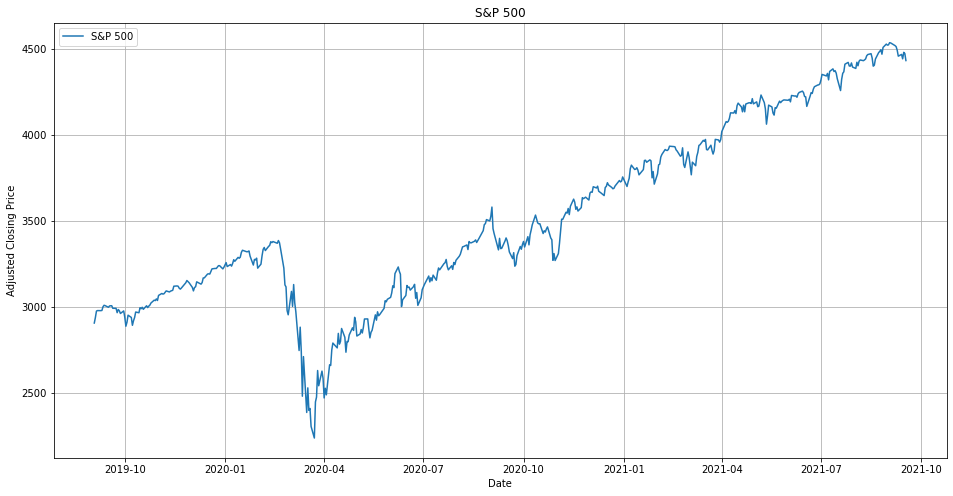

In [9]:
rcParams['figure.figsize'] = 16,8
plt.plot(stocksDF.GSPC, label='S&P 500')
plt.title("S&P 500")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

## Sectors

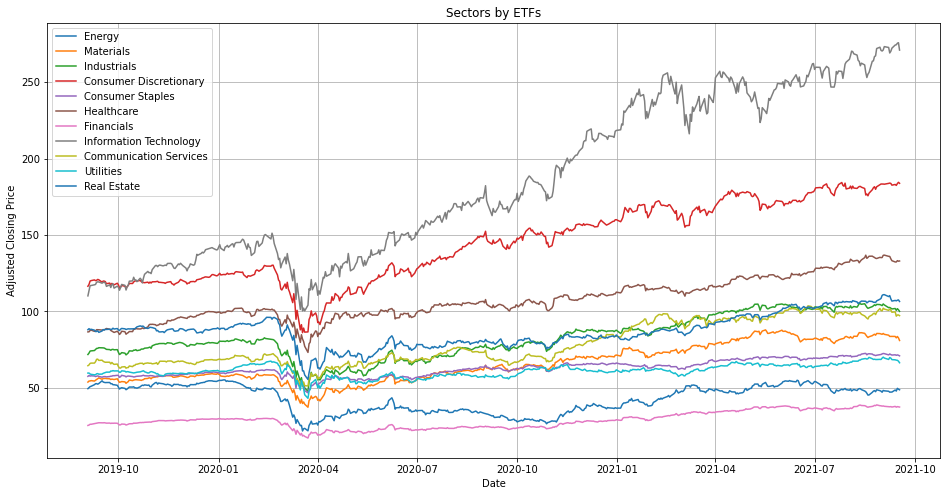

In [10]:
rcParams['figure.figsize'] = 16,8
plt.plot(sectorsDF.Energy, label='Energy')
plt.plot(sectorsDF.Materials, label='Materials')
plt.plot(sectorsDF.Industrial, label='Industrials')
plt.plot(sectorsDF.ConsDisc, label='Consumer Discretionary')
plt.plot(sectorsDF.ConsStaple, label='Consumer Staples')
plt.plot(sectorsDF.Health, label='Healthcare')
plt.plot(sectorsDF.Financial, label='Financials')
plt.plot(sectorsDF.InfoTech, label='Information Technology')
plt.plot(sectorsDF.Communication, label='Communication Services')
plt.plot(sectorsDF.Utilities, label='Utilities')
plt.plot(sectorsDF.RealEstate, label='Real Estate')
plt.title("Sectors by ETFs")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

## Apple vs Microsoft

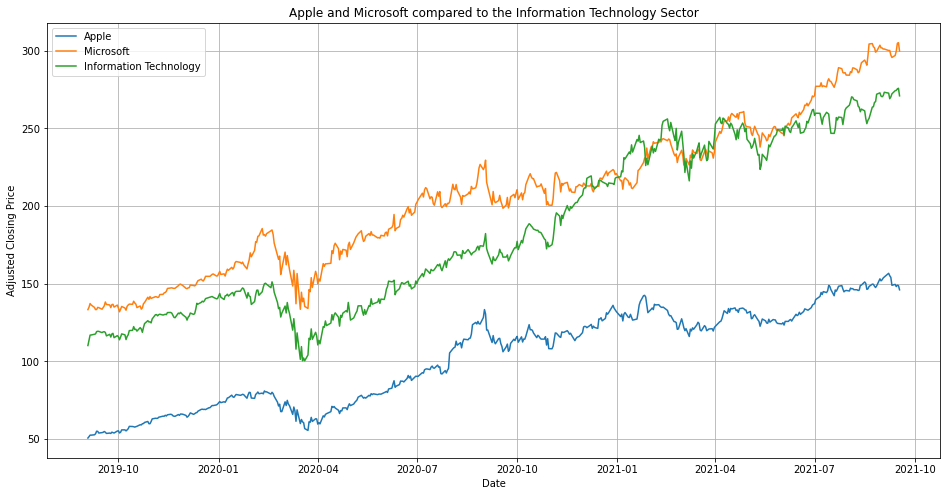

In [11]:
rcParams['figure.figsize'] = 16,8
plt.plot(stocksDF.AAPL, label='Apple')
plt.plot(stocksDF.MSFT, label='Microsoft')
plt.plot(sectorsDF.InfoTech, label='Information Technology')
plt.title("Apple and Microsoft compared to the Information Technology Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

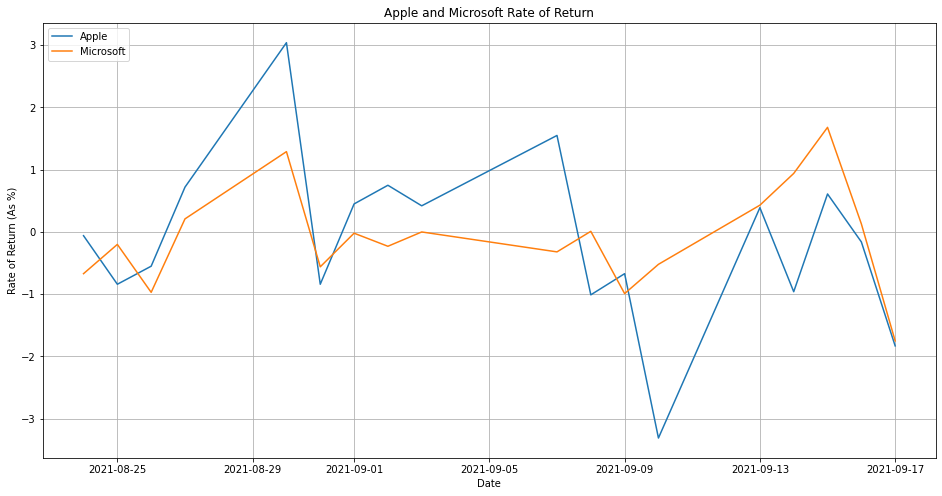

In [12]:
rcParams['figure.figsize'] = 16,8
plt.plot(returns2DF.AAPL_return, label='Apple')
plt.plot(returns2DF.MSFT_return, label='Microsoft')
plt.title("Apple and Microsoft Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return (As %)")
plt.grid(True)
plt.legend(loc=2);

### Apple
* Starting price: 08-23-2021 149.71
* Ending price:   09-17-2021 146.06 (-3.65)
* Biggest gain:   08-30-2021 +4.52 (+3.04%)
* Biggest loss:   09-10-2021 -5.10 (-3.31%)

### Microsoft
* Starting price: 08-23-2021 304.65
* Ending price:   09-17-2021 299.87 (-4.78)
* Biggest gain:   09-15-2021 +5.03 (+1.68%)
* Biggest loss:   09-17-2021 -5.35 (-1.75%)

## Amazon vs Alibaba

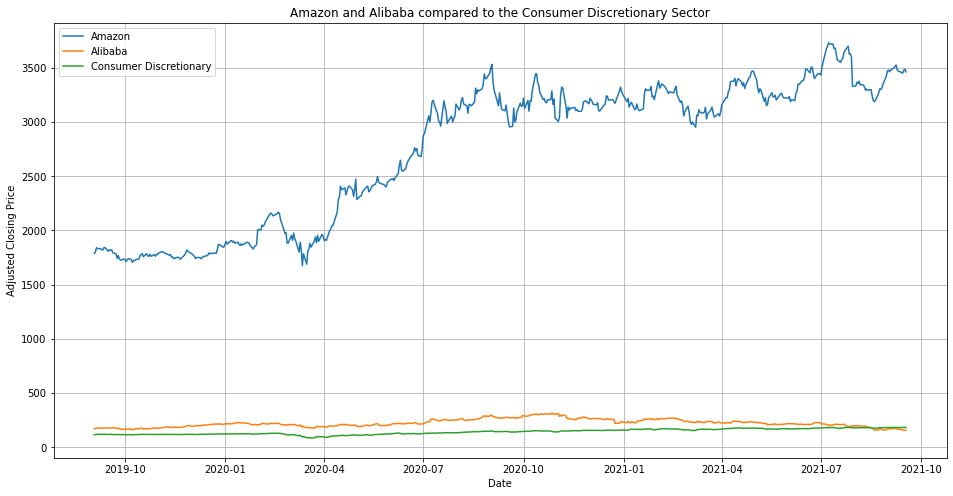

In [13]:
rcParams['figure.figsize'] = 16,8
plt.plot(stocksDF.AMZN, label='Amazon')
plt.plot(stocksDF.BABA, label='Alibaba')
plt.plot(sectorsDF.ConsDisc, label='Consumer Discretionary')
plt.title("Amazon and Alibaba compared to the Consumer Discretionary Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

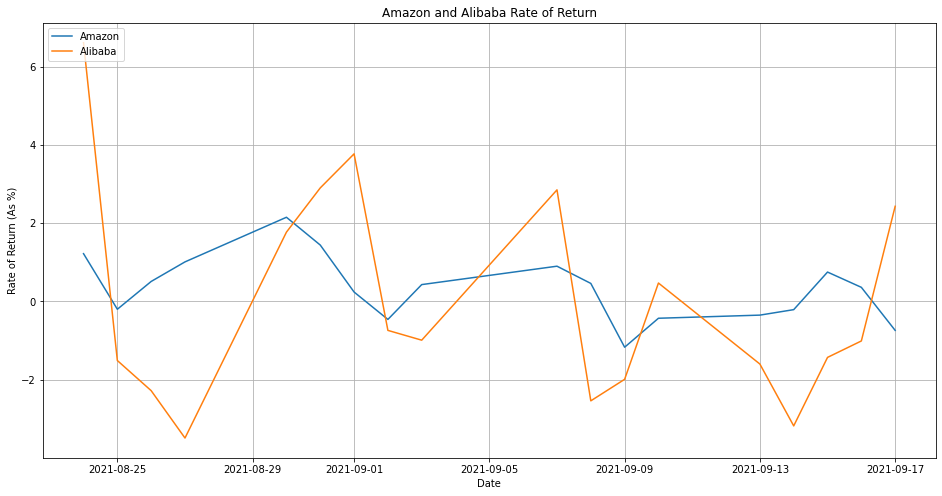

In [14]:
rcParams['figure.figsize'] = 16,8
plt.plot(returns2DF.AMZN_return, label='Amazon')
plt.plot(returns2DF.BABA_return, label='Alibaba')
plt.title("Amazon and Alibaba Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return (As %)")
plt.grid(True)
plt.legend(loc=2);

### Amazon
* Starting price: 08-23-2021 3265.87
* Ending price:   09-17-2021 3462.52 (+196.65)
* Biggest gain:   08-30-2021 +71.94 (+2.15%)
* Biggest loss:   09-09-2021 -41.34 (-1.17%)

### Alibaba
* Starting price: 08-23-2021 161.06
* Ending price:   09-17-2021 160.05 (-1.01)
* Biggest gain:   08-24-2021 +10.64 (+6.61%)
* Biggest loss:   08-27-2021 -5.77 (-3.49%)

## Coca-Cola vs Pepsi

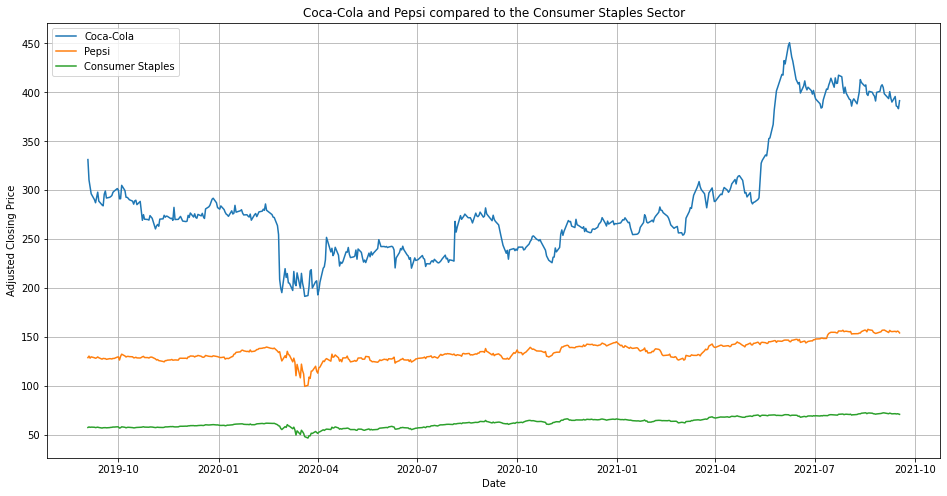

In [15]:
rcParams['figure.figsize'] = 16,8
plt.plot(stocksDF.COKE, label='Coca-Cola')
plt.plot(stocksDF.PEP, label='Pepsi')
plt.plot(sectorsDF.ConsStaple, label='Consumer Staples')
plt.title("Coca-Cola and Pepsi compared to the Consumer Staples Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

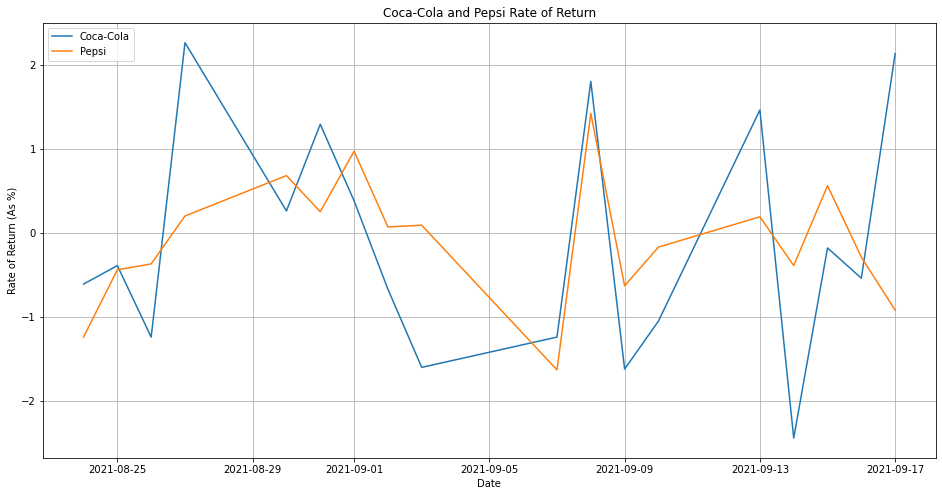

In [16]:
rcParams['figure.figsize'] = 16,8
plt.plot(returns2DF.COKE_return, label='Coca-Cola')
plt.plot(returns2DF.PEP_return, label='Pepsi')
plt.title("Coca-Cola and Pepsi Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return (As %)")
plt.grid(True)
plt.legend(loc=2);

### Coca-Cola
* Starting price: 08-23-2021 400.00
* Ending price:   09-17-2021 391.43 (-8.57)
* Biggest gain:   08-27-2021 +8.85 (+2.26%)
* Biggest loss:   09-14-2021 -9.67 (-2.44%)

### Pepsi
* Starting price: 08-23-2021 156.78
* Ending price:   09-17-2021 154.13 (-2.65)
* Biggest gain:   09-08-2021 +2.19 (+1.42%)
* Biggest loss:   09-07-2021 -2.56 (-1.63%)

## Alphabet, Inc. (Google) vs Microsoft

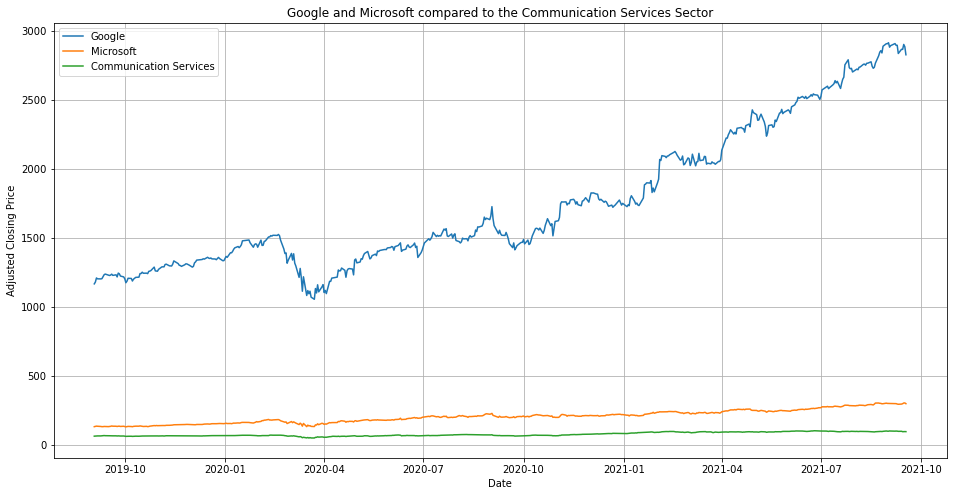

In [17]:
rcParams['figure.figsize'] = 16,8
plt.plot(stocksDF.GOOG, label='Google')
plt.plot(stocksDF.MSFT, label='Microsoft')
plt.plot(sectorsDF.Communication, label='Communication Services')
plt.title("Google and Microsoft compared to the Communication Services Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

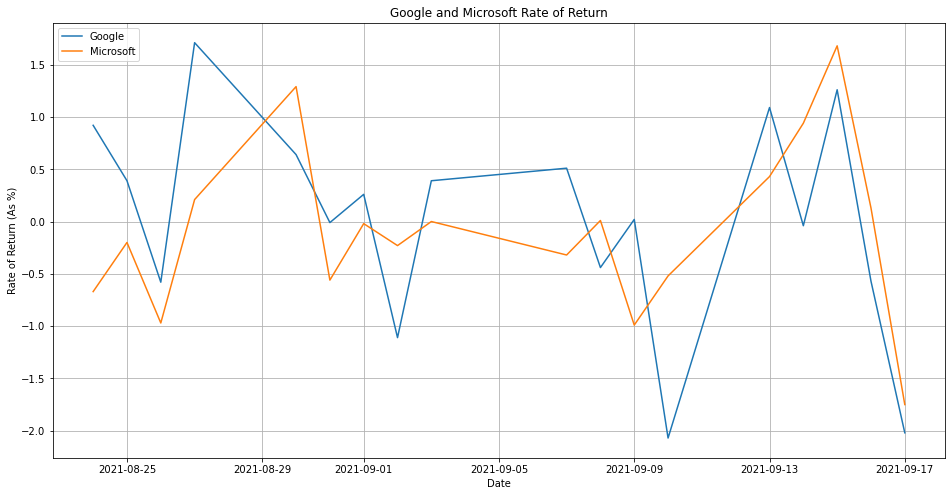

In [18]:
rcParams['figure.figsize'] = 16,8
plt.plot(returns2DF.GOOG_return, label='Google')
plt.plot(returns2DF.MSFT_return, label='Microsoft')
plt.title("Google and Microsoft Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return (As %)")
plt.grid(True)
plt.legend(loc=2);

### Google
* Starting price: 08-23-2021 2821.99
* Ending price:   09-17-2021 2829.27 (+7.28)
* Biggest gain:   08-27-2021 +48.55 (+1.71%)
* Biggest loss:   09-10-2021 -59.85 (-2.07%)

### Microsoft
* Starting price: 08-23-2021 304.65
* Ending price:   09-17-2021 299.87 (-4.78)
* Biggest gain:   09-15-2021 +5.03 (+1.68%)
* Biggest loss:   09-17-2021 -5.35 (-1.75%)

## Ford vs GM

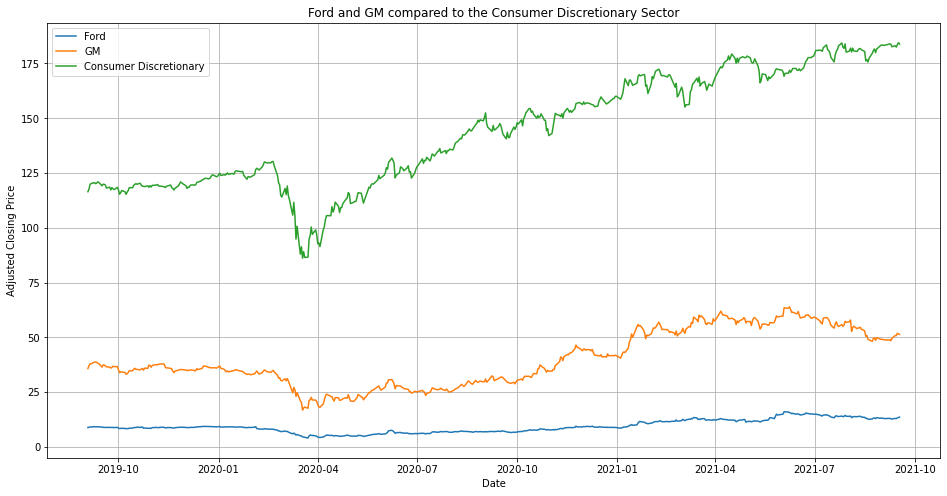

In [19]:
rcParams['figure.figsize'] = 16,8
plt.plot(stocksDF.F, label='Ford')
plt.plot(stocksDF.GM, label='GM')
plt.plot(sectorsDF.ConsDisc, label='Consumer Discretionary')
plt.title("Ford and GM compared to the Consumer Discretionary Sector")
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.grid(True)
plt.legend(loc=2);

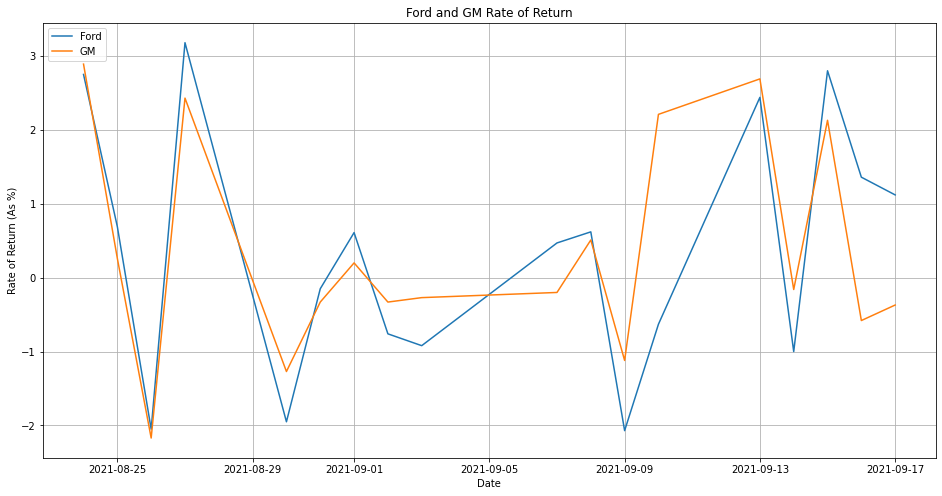

In [20]:
rcParams['figure.figsize'] = 16,8
plt.plot(returns2DF.F_return, label='Ford')
plt.plot(returns2DF.GM_return, label='GM')
plt.title("Ford and GM Rate of Return")
plt.xlabel("Date")
plt.ylabel("Rate of Return (As %)")
plt.grid(True)
plt.legend(loc=2);

### Ford
* Starting price: 08-23-2021 12.73
* Ending price:   09-17-2021 13.55 (+0.82)
* Biggest gain:   08-27-2021 +0.41 (+3.18%)
* Biggest loss:   09-09-2021 -0.27 (-2.07%)

### GM
* Starting price: 08-23-2021 48.18
* Ending price:   09-17-2021 51.33 (+3.15)
* Biggest gain:   08-24-2021 +1.39 (+2.89%)
* Biggest loss:   08-26-2021 -1.08 (-2.17%)

# Presentation Link

https://docs.google.com/presentation/d/162mOBZfKkuPqXcNcT8w6-m20eQE2fa-2/edit#slide=id.p1